In [158]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification

from numpy import where

import scipy.stats as stats
from scipy.special import inv_boxcox   
import os #we will use the function listdir to list files in a folder
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'imblearn'

Data collection and exploration

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# Change capitalization to lowercase and replace spaces with underscores:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [8]:
round((customer_df.isna().sum()/len(customer_df)*100),2)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [9]:
customer_df.customer.unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [10]:
numericals = customer_df.select_dtypes(np.number)

In [11]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
for column in numericals:
    print(numericals[column].unique())

[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
[56274     0 48767 ... 66367 71941 21941]
[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286]
[32 13 18 12 14  0 17 23 27  9 21 11 31  8  4 30 22 

In [13]:
for column in numericals:
    print(len(numericals[column].unique()))

8041
5694
202
36
100
6
9
5106


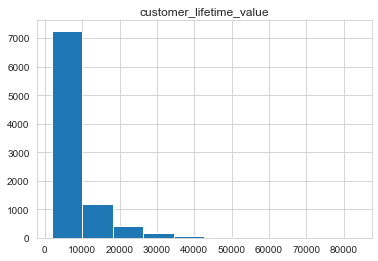

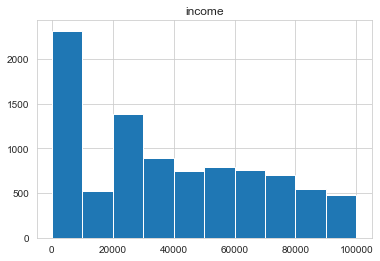

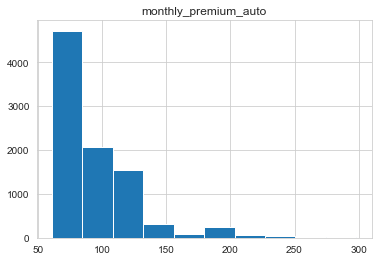

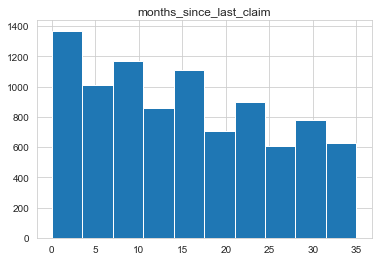

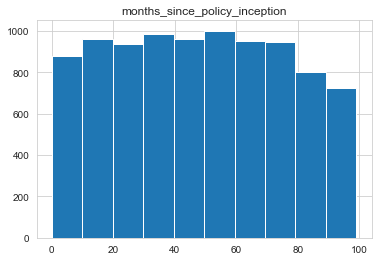

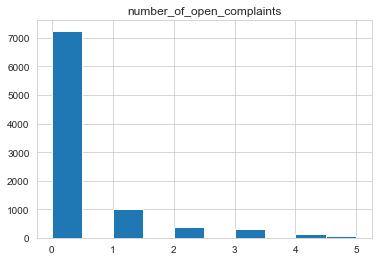

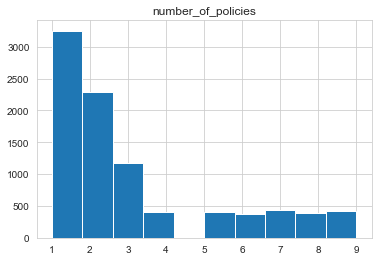

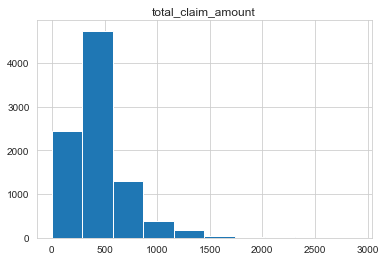

In [14]:
for column in numericals:
    numericals[column].hist()
    plt.title(column)
    plt.show()

In [15]:
def check_dtypes(numericals):
    test = numericals.dtypes
    x=0
    for i in range (len(numericals.columns)):
        print(test[x]," ", numericals.iloc[0][numericals.columns[i]]," ",numericals.columns[i])
        x+=1
    return()

In [16]:
check_dtypes(numericals)

float64   2763.519279   customer_lifetime_value
int64   56274.0   income
int64   69.0   monthly_premium_auto
int64   32.0   months_since_last_claim
int64   5.0   months_since_policy_inception
int64   0.0   number_of_open_complaints
int64   1.0   number_of_policies
float64   384.811147   total_claim_amount


()

In [17]:
# Discrete: number_of_policies, number_of_open_complaints, months_since_policy_inception, months_since_last_claim
# Continuous: monthly_premium_auto, total_claim_amount,income,customer_lifetime_value
# Why monthly_premium_auto is in continous: it's calculated based 
# on a lot of different criteria (type of cars, policies taken, age of the main driver, how many accidents you had and when etc.)
# so with all these combinations of inputs we can get any number of monthly_premium_auto.

In [18]:
numericals['income'] = numericals['income'].astype(float)
numericals['monthly_premium_auto'] = numericals['income'].astype(float)
check_dtypes(numericals)

float64   2763.519279   customer_lifetime_value
float64   56274.0   income
float64   56274.0   monthly_premium_auto
int64   32.0   months_since_last_claim
int64   5.0   months_since_policy_inception
int64   0.0   number_of_open_complaints
int64   1.0   number_of_policies
float64   384.811147   total_claim_amount


()

In [19]:
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

In [20]:
continuous, discrete = to_dict(numericals)


In [21]:
type(discrete)

dict

In [22]:
discrete.keys()

dict_keys(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'])

In [23]:
continuous.keys()

dict_keys(['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount'])

In [24]:
cat = customer_df.select_dtypes(np.object)
cat.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [25]:
for column in cat:
    print(cat[column].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [26]:
for column in cat:
    print(len(cat[column].unique()))

9134
5
2
3
5
5
2
3
3
3
9
4
4
6
3


In [27]:
check_dtypes(cat)

object   BU79786   customer
object   Washington   state
object   No   response
object   Basic   coverage
object   Bachelor   education
object   Employed   employmentstatus
object   F   gender
object   Suburban   location_code
object   Married   marital_status
object   Corporate Auto   policy_type
object   Corporate L3   policy
object   Offer1   renew_offer_type
object   Agent   sales_channel
object   Two-Door Car   vehicle_class
object   Medsize   vehicle_size


()

In [28]:
# customer => continuous but would be better to set it as the index
# all the other variables are discrete
# text in cat variable is already clean

In [29]:
# not sure if we're meant to add the cat variables to the discrete variable
cat_dict = cat.to_dict()

In [30]:
cat_dict.keys()

dict_keys(['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'])

In [31]:
discrete_df = pd.DataFrame.from_dict(discrete)

In [32]:
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [33]:
continuous_df = pd.DataFrame.from_dict(continuous)

In [34]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274.0,56274.0,384.811147
1,6979.535903,0.0,0.0,1131.464935
2,12887.431650,48767.0,48767.0,566.472247
3,7645.861827,0.0,0.0,529.881344
4,2813.692575,43836.0,43836.0,138.130879


In [35]:
# 10. What should we do with the customer_id column? => should be set as the index
customer_df = customer_df.set_index('customer')
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [36]:
cat = cat.set_index('customer')
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [37]:
# Lab | Cleaning categorical data
# 3. Plot a correlation matrix, what can you see?
continuous_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.024366,0.226451
income,0.024366,1.000000,1.000000,-0.355254
monthly_premium_auto,0.024366,1.000000,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,-0.355254,1.000000


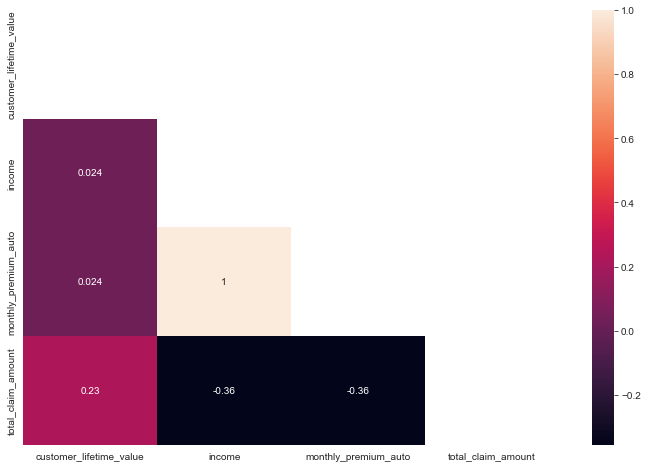

In [38]:
mask = np.zeros_like(continuous_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show()

# Perfect positive correlation between income and monthly_premium_auto
# not any significicant positive or negative correlation between the other categories

In [39]:
discrete_df.corr()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
months_since_last_claim,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.009136,-0.013333,0.001498,1.000000


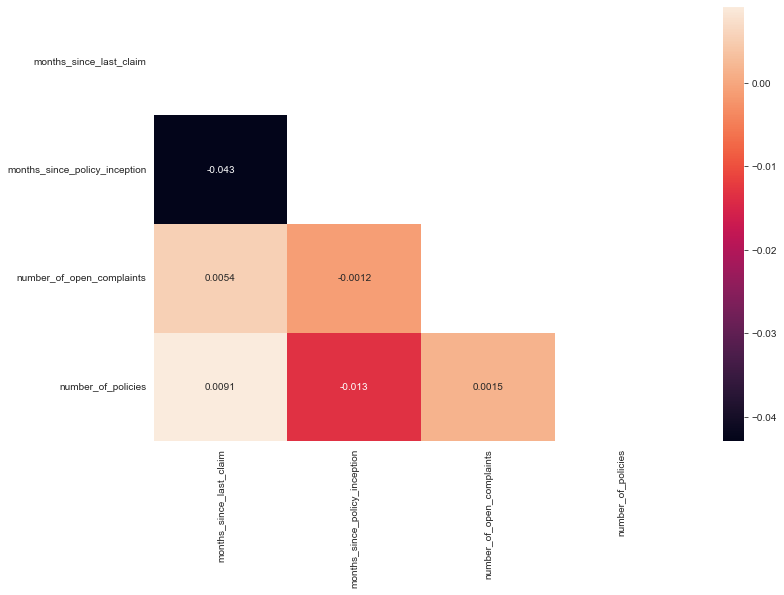

In [40]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

# Very, very low correlations, the maximujm is 4,3% between months_since policy inception and months_since_last_cla

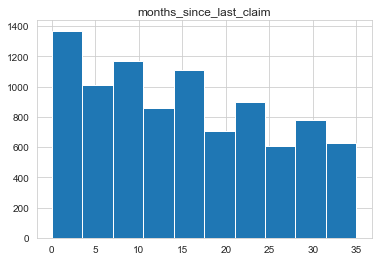

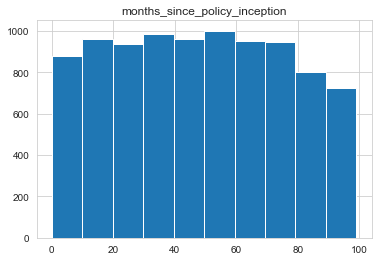

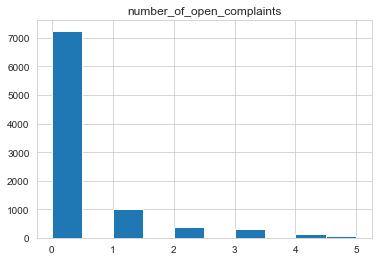

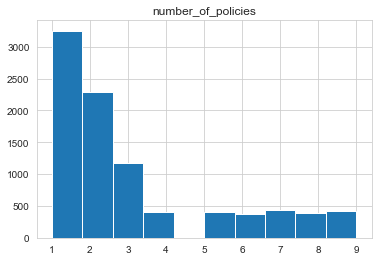

In [41]:
# Create a function to plot every discrete variables
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

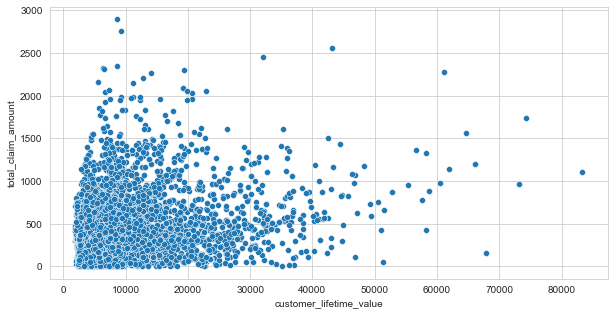

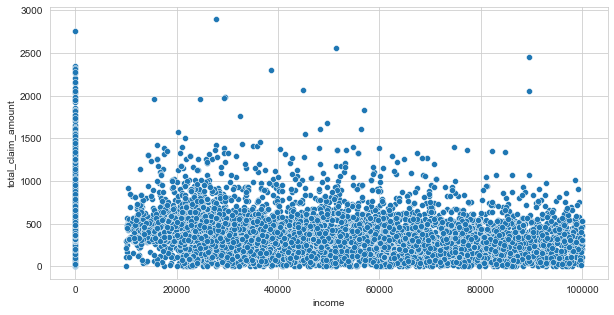

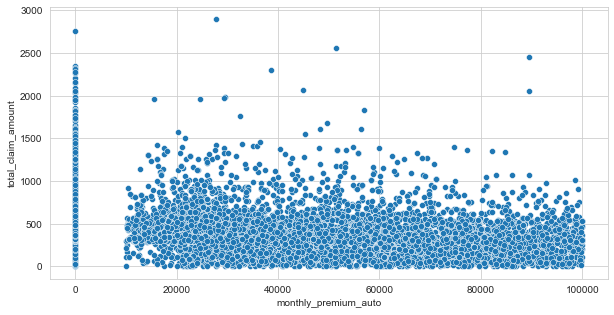

In [42]:
# Observations: no normal distributions
# Some discrete values are evenly distributed between each unique values, so maybe not relevant if they're all identical in proportion   
# Do the same with continuous variables 
cols_to_include = continuous_df.loc[:, continuous_df.columns != 'total_claim_amount']
for column in cols_to_include:
    plt.figure(figsize=(10,5))
    sns.scatterplot(continuous_df[column],continuous_df['total_claim_amount'])
    plt.show()

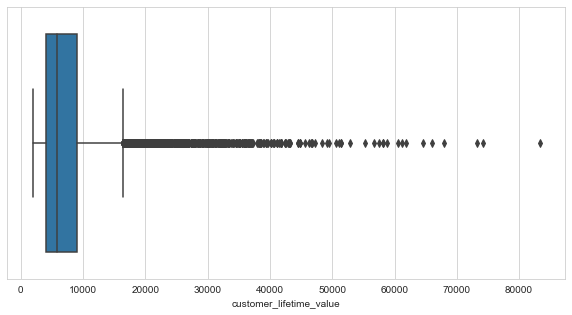

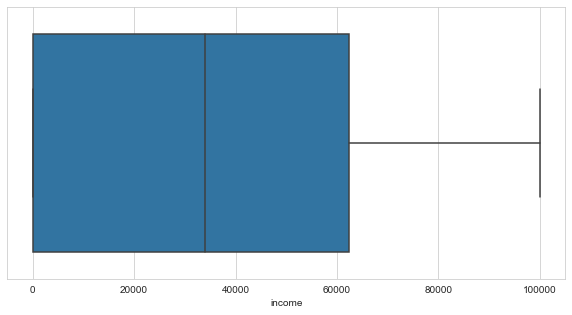

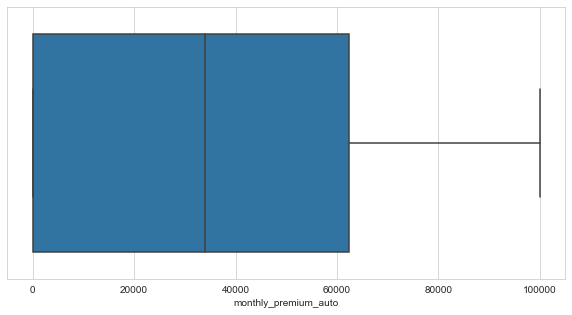

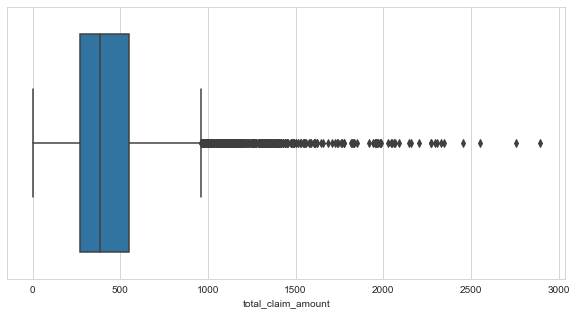

In [43]:
# Observations: there seems to be not a lot of correlation between the monthly_premium_auto, the income and the target
# However we can see a correlation between the customer_lifetime_value and the target, it follows a y = 3x pattern.
for col in continuous_df:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous_df[col])
    plt.show()

In [44]:
Total_claim_amount and customer_lifetime_value have the most outliers
We first apply the BoxCox transformation, which will get rid of some of the outliers.

SyntaxError: invalid syntax (Temp/ipykernel_57396/3210276649.py, line 1)

In [ ]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].median())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [ ]:
continuous, _ci = boxcox_transform(continuous_df)
continuous.head()

In [45]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [46]:
continuous = remove_outliers(continuous, threshold=1.5)

AttributeError: 'dict' object has no attribute 'select_dtypes'

In [47]:
for col in continuous:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous[col])
    plt.show()


AttributeError: 'bool' object has no attribute 'all'

<Figure size 720x360 with 0 Axes>

In [48]:
# Checking NaN values per column
def check_nan(df):
    nulls = pd.DataFrame(df.isna().sum()/len(df))
    nulls= nulls.reset_index()
    nulls.columns = ['column_name', 'Percentage Null Values']
    nulls.sort_values(by='Percentage Null Values', ascending = False)
    return nulls

In [49]:
cont = check_nan(continuous)
cont


AttributeError: 'dict' object has no attribute 'isna'

In [50]:
disc = check_nan(discrete_df)

In [51]:
disc

,column_name,Percentage Null Values
0,months_since_last_claim,0.0
1,months_since_policy_inception,0.0
2,number_of_open_complaints,0.0
3,number_of_policies,0.0


In [52]:
# 9. Define a function that differentiate between continuous and discrete variables. 
# Hint: Number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.
# Was already done
#def to_dict(df):
#    for col in df.columns:
#        if df[col].dtypes == 'int64':
#            df1 = df.select_dtypes(include='int64')
#            discrete = df1.to_dict()
#        else:
#            df2 = df.select_dtypes(include='float64')
#            continuous = df2.to_dict()
#    return continuous, discrete

In [53]:
# 10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
# Hint: Use the same method you used in step 7. 
# Depending on the implementation, decide what to do with the variables you get.

# 10 to 12 is already done

cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [54]:
for col in cat:
    x = cat[col].unique()
    print(x)

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [55]:
# Lab | Feature extraction
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


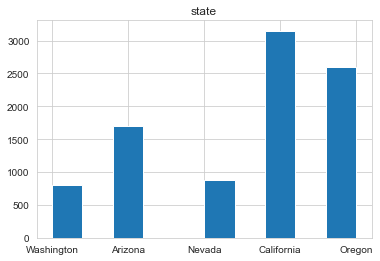

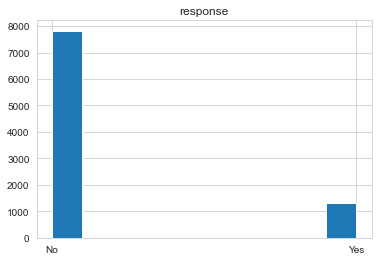

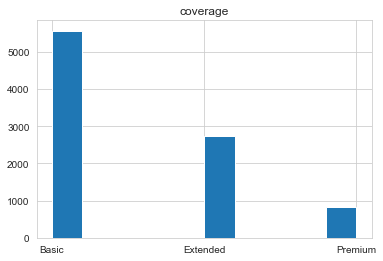

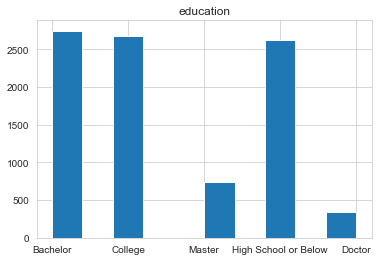

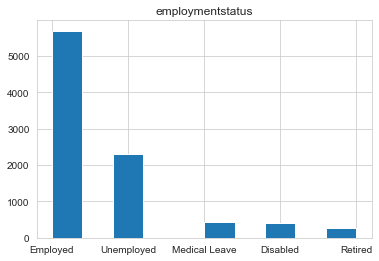

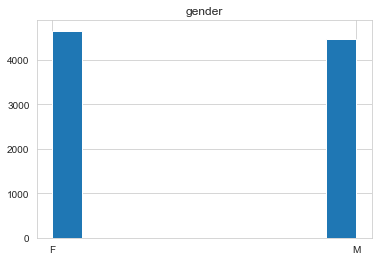

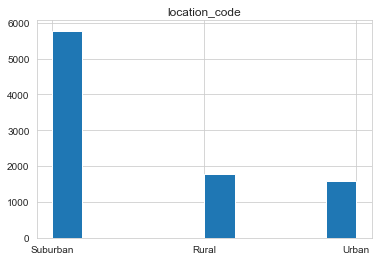

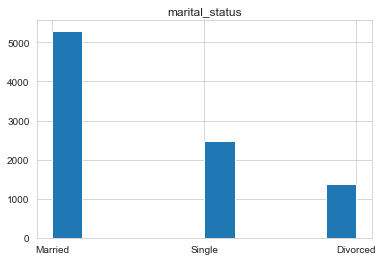

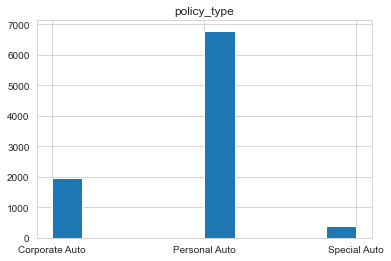

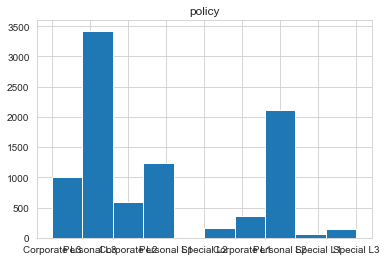

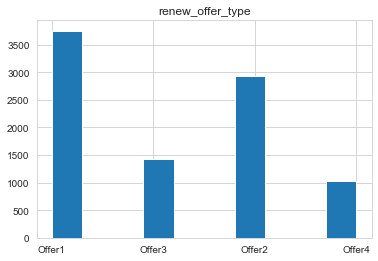

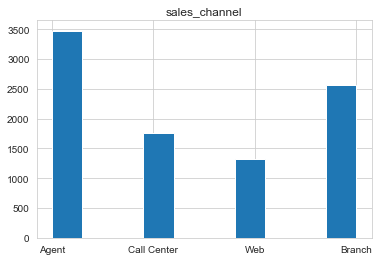

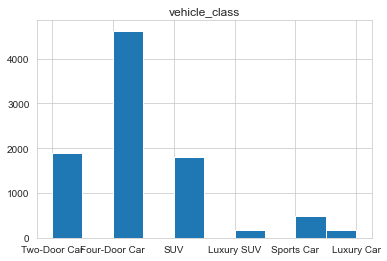

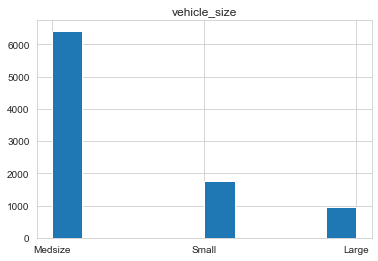

In [56]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
# to see the distribution
for col in cat:
    cat[col].hist()
    plt.title(col)
    plt.show()

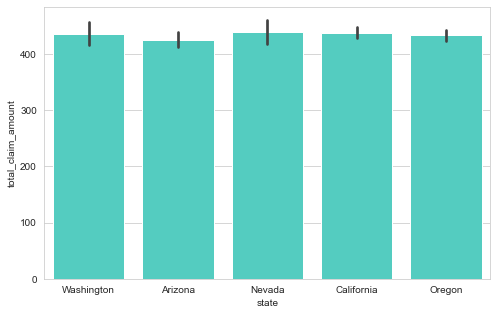

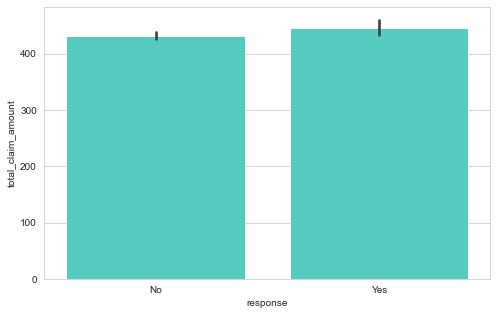

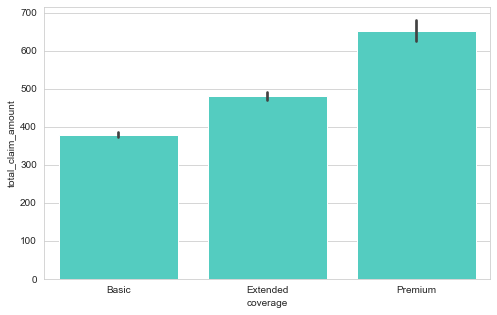

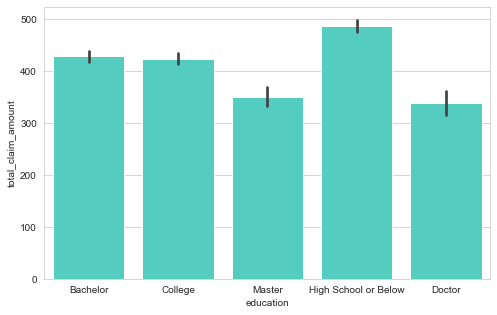

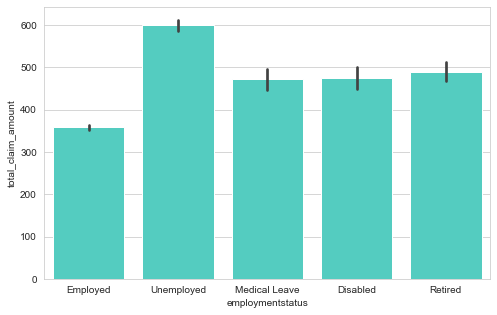

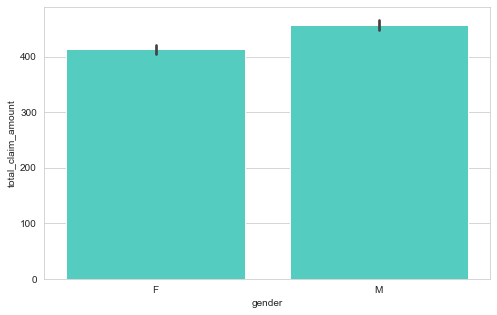

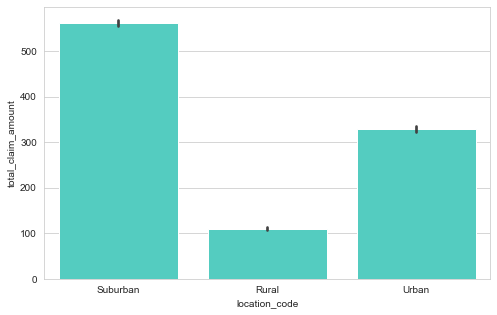

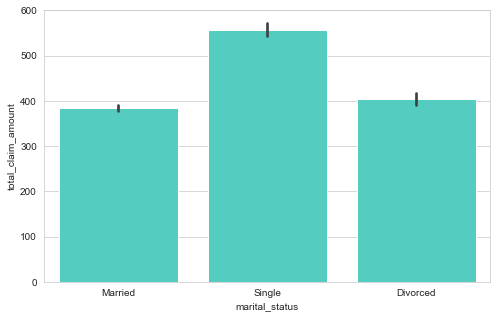

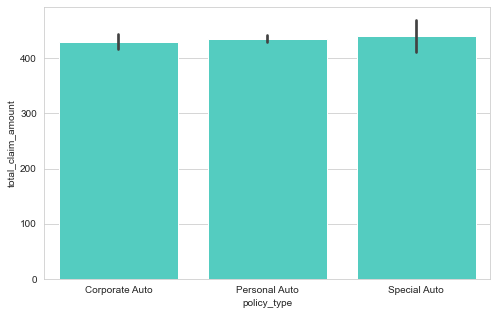

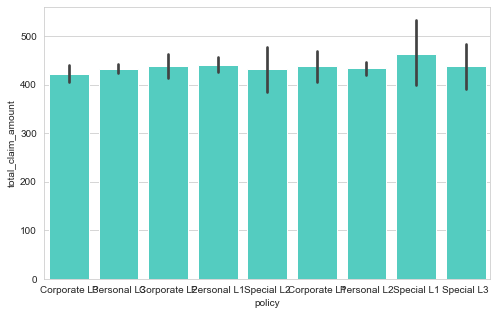

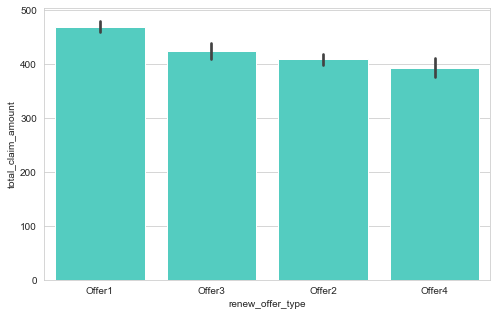

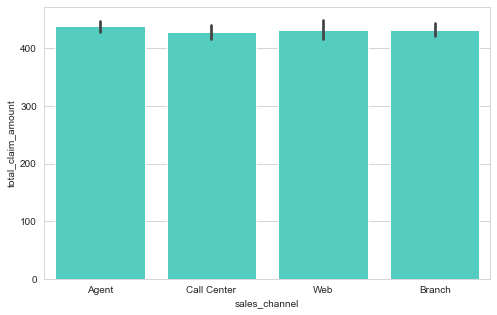

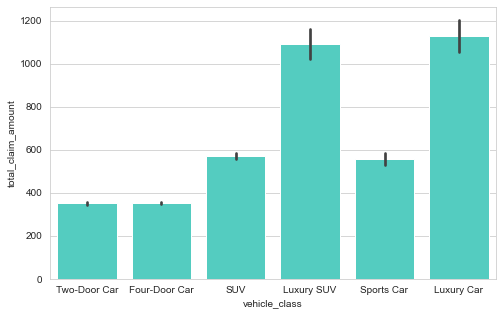

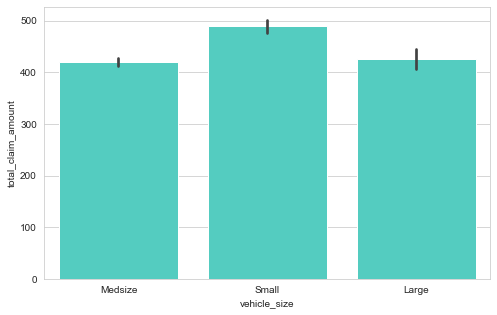

In [57]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.barplot(x=cat[col],y=customer_df['total_claim_amount'], color='turquoise')

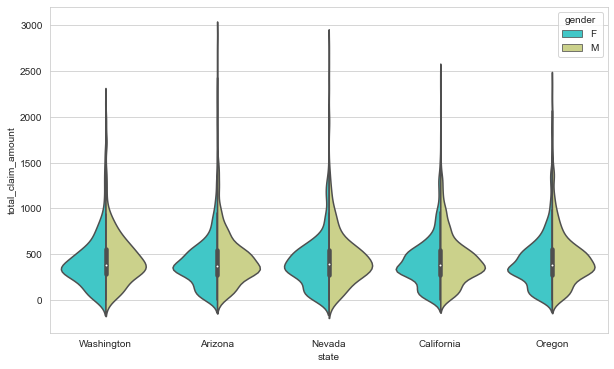

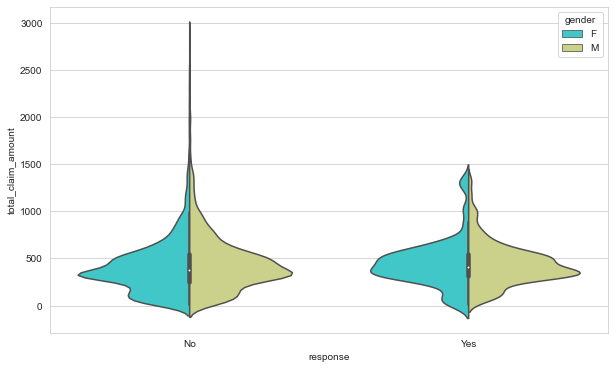

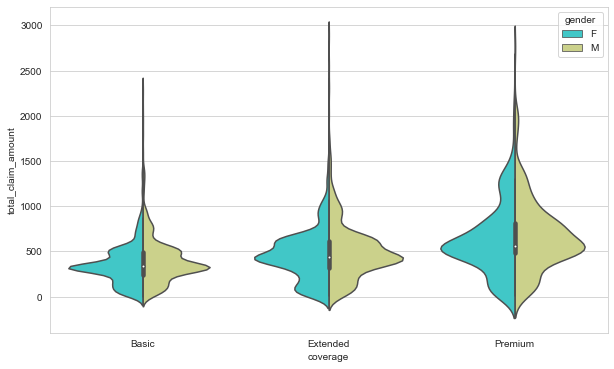

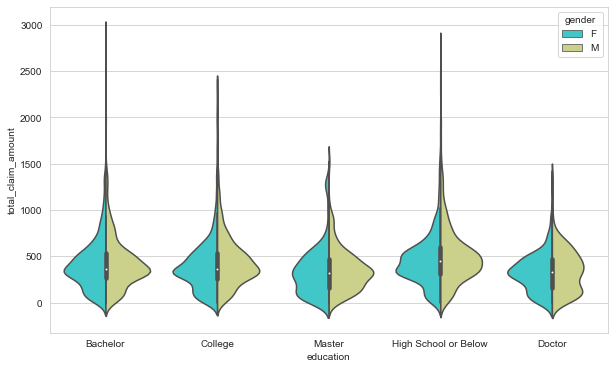

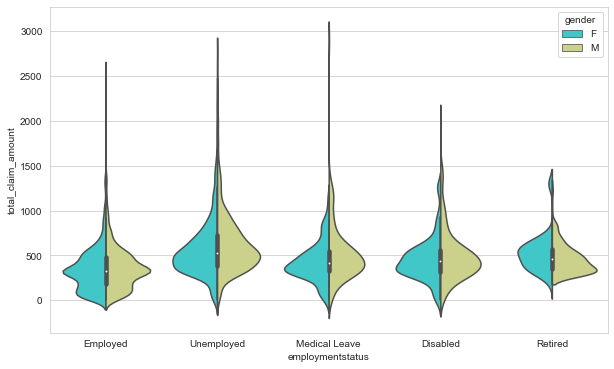

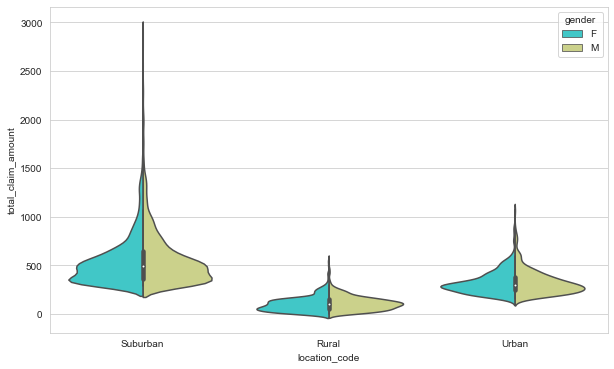

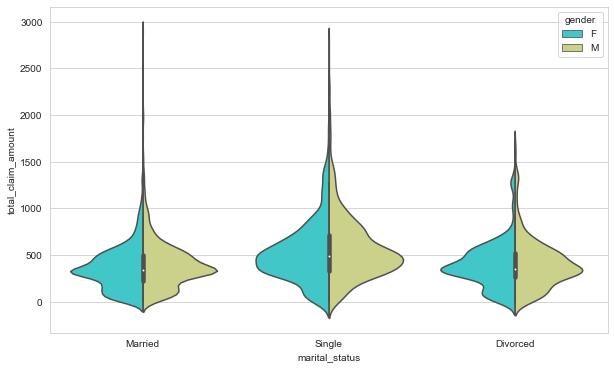

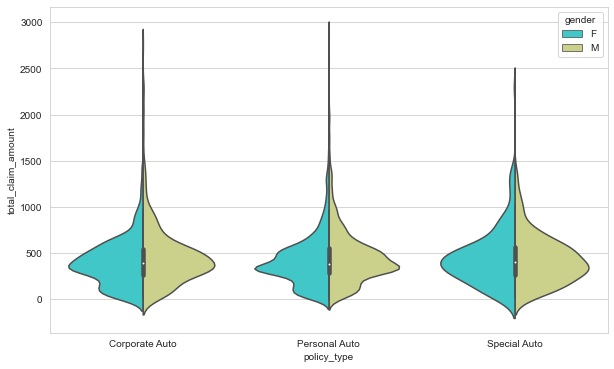

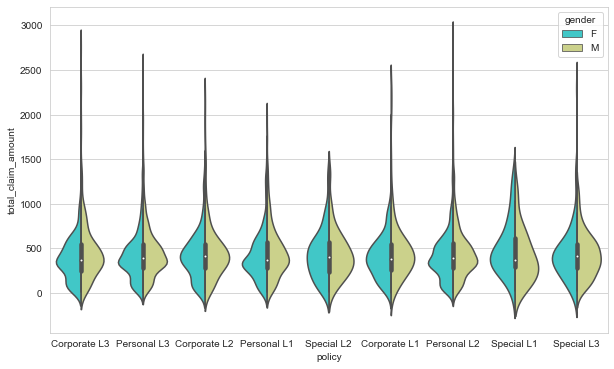

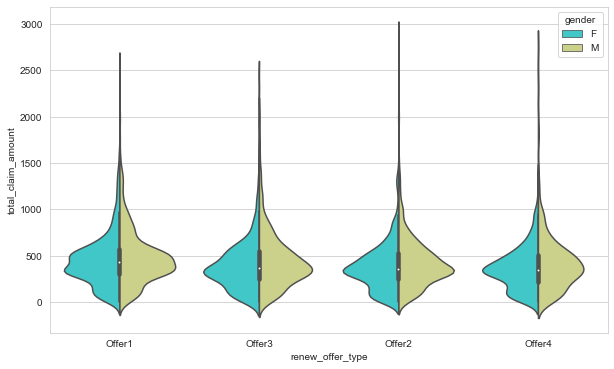

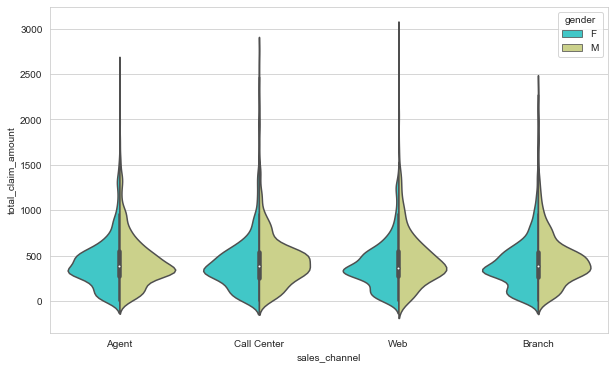

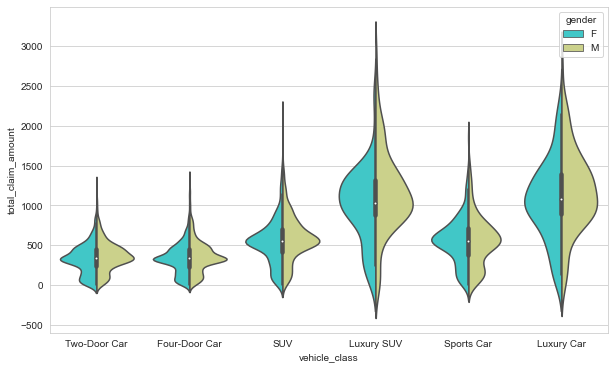

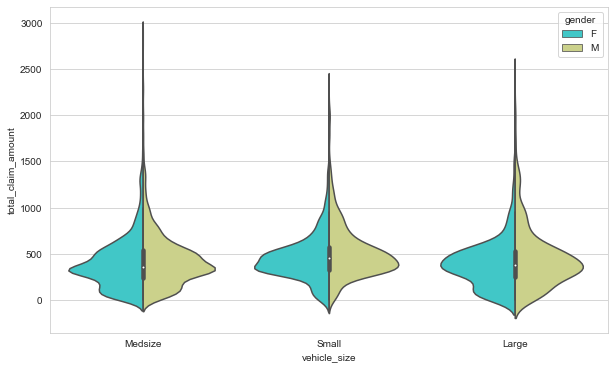

In [58]:
cats_to_include = cat.loc[:, cat.columns != 'gender']
for col in cats_to_include:
    plt.figure(figsize=(10,6))
    sns.violinplot(x=cat[col],y=customer_df['total_claim_amount'], hue=cat['gender'], split='True', palette='rainbow')
    plt.show

Observations:
The gender columns appears to be redundant as there seems to be no difference in distributionn for almost all the other colums (the violin plots are symmetrical enough)

Policy type and policy are also repetitive, policy type doesn't tell us anything that isn't already in policy. I would keep policy and drop policy type.

The same observation applies to vehicle_class and vehicle_size, I would keep the vehicle class.

In [59]:
cat = cat.drop(['gender','policy_type','vehicle_size'], axis=1)
cat.head()

,state,response,coverage,education,employmentstatus,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
customer,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car
AI49188,Nevada,No,Premium,Bachelor,Employed,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car
WW63253,California,No,Basic,Bachelor,Unemployed,Suburban,Married,Corporate L2,Offer1,Call Center,SUV
HB64268,Washington,No,Basic,Bachelor,Employed,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car


In [60]:
# Plot time variable
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [61]:
customer_df.effective_to_date.unique()

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

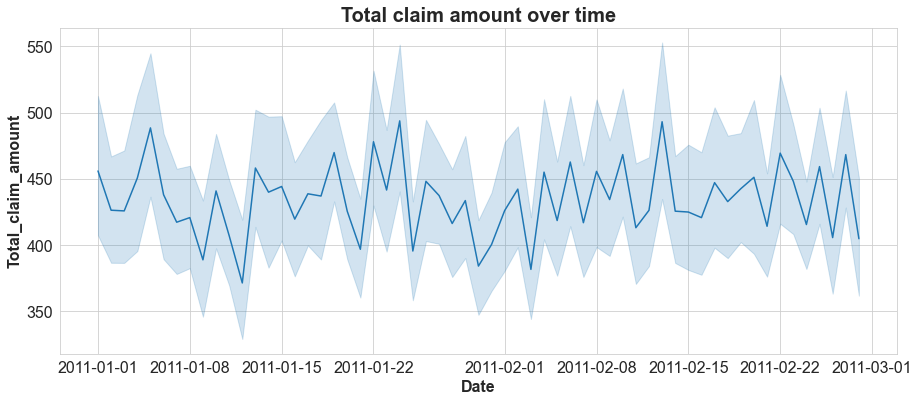

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(customer_df['effective_to_date'], customer_df['total_claim_amount'] )

ax.set_title('Total claim amount over time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total_claim_amount', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

In [63]:
time_plot = customer_df.copy()

In [64]:
time_plot['month']= time_plot['effective_to_date'].dt.month
time_plot['day']= time_plot['effective_to_date'].dt.day
time_plot.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


Text(0, 0.5, 'Total Claim Amount')

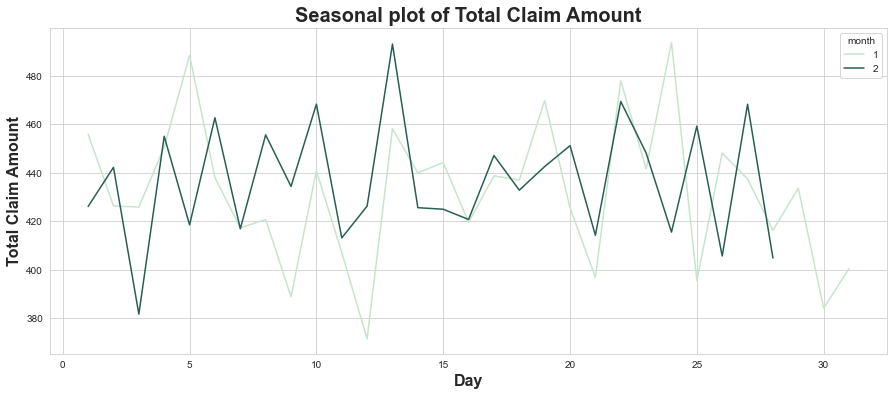

In [65]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 2)
sns.lineplot(time_plot['day'], time_plot['total_claim_amount'], hue=time_plot['month'], palette=palette, ci=None)
ax.set_title('Seasonal plot of Total Claim Amount', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total Claim Amount', fontsize = 16, fontdict=dict(weight='bold'))

In [66]:
# there seems to be an overall monthly trend

# Lab | Data cleaning and wrangling

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers.
Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [71]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df
# already used it on the continuous dataframe

2. Create a copy of the dataframe

In [76]:
data_copy = customer_df.copy()

3. Normalize the continuous variables. You can use any one method you want.
I will use the StandardScaler

In [79]:
transformer = StandardScaler().fit(continuous)
x_standardized = transformer.transform(continuous)
x= pd.DataFrame(x_standardized)
x.columns = continuous.columns
x.head()


TypeError: float() argument must be a string or a number, not 'dict'

Merging the numerical dataframes:

In [80]:
len(discrete_df)-len(X)

NameError: name 'X' is not defined

In [81]:
# Left join
X.reset_index(drop=True, inplace=True)
discrete_df.reset_index(drop=True, inplace=True)
numerical_df = pd.merge(X, discrete_df, how='left', left_index=True, right_index=True)
numerical_df

NameError: name 'X' is not defined

4. Encode the categorical variables

In [82]:
cat_encoded = pd.get_dummies(cat, columns=cat.columns, drop_first=True)
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
cat_encoded.shape

(9134, 38)

In [84]:
5. The time variable can be useful. Try to transform its data into a useful one.
Hint: Day week and month as integers might be useful. \ => Has already been done in order to plot the datetime data. \ I will apply the same method on data_copy and drop the effective_to_date column

SyntaxError: invalid syntax (Temp/ipykernel_57396/2786739060.py, line 1)

In [85]:
time_plot.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [86]:
data_copy['month']= data_copy['effective_to_date'].dt.month
data_copy['day']= data_copy['effective_to_date'].dt.day
data_copy = data_copy.drop(['effective_to_date'], axis=1)

In [87]:
data_copy.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [88]:
6. Since the model will only accept numerical data:
Check and make sure that every column is numerical, if some are not, change it using encoding: \ \ One hot to state \ Ordinal to coverage \ Ordinal to employmentstatus \ Ordinal to location code \ One hot to marital status \ One hot to policy type \ One hot to policy \ One hot to renew offercustomer_df \ One hot to sales channel \ One hot vehicle class \ Ordinal vehicle size \ \ data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}) \ given that column "coverage" in the dataframe "data" has three categories: \ "basic", "extended", and "premium" and values are to be represented in the same order.

SyntaxError: invalid syntax (Temp/ipykernel_57396/4265506789.py, line 1)

4.bis - Will encode the categories differently, based on the Hint

In [89]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data_copy[['state', 'marital_status','policy_type','policy','renew_offer_type', 'sales_channel','vehicle_class']])
encoded = encoder.transform(data_copy[['state', 'marital_status','policy_type','policy','renew_offer_type', 'sales_channel','vehicle_class']]).toarray()
encoded

NameError: name 'OneHotEncoder' is not defined

In [90]:
encoded_cat = pd.DataFrame(encoded)
encoded_cat

NameError: name 'encoded' is not defined

In [91]:
encoded_cat.columns = encoder.get_feature_names()

NameError: name 'encoder' is not defined

In [92]:
encoded_cat

NameError: name 'encoded_cat' is not defined

In [93]:
ORDINAL ENCODING
Ordinal to coverage \ Ordinal to employmentstatus \ Ordinal to location code \ Ordinal vehicle size

SyntaxError: invalid syntax (Temp/ipykernel_57396/874905371.py, line 1)

In [94]:
ordinal = data_copy[['coverage','employmentstatus','location_code','vehicle_size']]
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,Basic,Employed,Suburban,Medsize
QZ44356,Extended,Unemployed,Suburban,Medsize
AI49188,Premium,Employed,Suburban,Medsize
WW63253,Basic,Unemployed,Suburban,Medsize
HB64268,Basic,Employed,Rural,Medsize
...,...,...,...,...
LA72316,Basic,Employed,Urban,Medsize
PK87824,Extended,Employed,Suburban,Medsize
TD14365,Extended,Unemployed,Suburban,Medsize


In [95]:
1. encode the coverage - first we look at the unique values and the count

SyntaxError: invalid syntax (Temp/ipykernel_57396/610074152.py, line 1)

In [96]:
ordinal.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [97]:
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

SyntaxError: invalid syntax (Temp/ipykernel_57396/3257238047.py, line 1)

In [98]:
# Intuitively we want to rank like this:
# Define a dictionary for encoding variable
cov_dict = {'Basic':0,
            'Extended':1,
            'Premium':2}

# Create the mapped values in a new column
ordinal['coverage'] = ordinal['coverage'].map(cov_dict)

# Check
ordinal
c

NameError: name 'c' is not defined

In [99]:
2. Encode the employmentstatus

SyntaxError: invalid syntax (Temp/ipykernel_57396/2235741873.py, line 1)

In [100]:
ordinal.employmentstatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [101]:
# first we'll put Medical leave, Disabled and Retired in a new category called 'other'.
# we could also put these in unemployed but I'd say from a monetary perspective they wouldn't get the same revenues,
# for ex, a retired person has (ideally) more revenue and proprietary goods than an unemployed person
count_emp = pd.DataFrame(ordinal['employmentstatus'].value_counts())
count_emp = count_emp.reset_index()
count_emp.columns = ['status', 'counts']
other_df = count_emp[count_emp['counts']<500]
other_df = list(other_df['status'])
other_df

['Medical Leave', 'Disabled', 'Retired']

In [102]:
def clean_employement_status(x):
    if x in other_df:
        return 'Other'
    else:
        return x

ordinal['employmentstatus'] = list(map(clean_employement_status, ordinal['employmentstatus']))
ordinal.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

<AxesSubplot:xlabel='employmentstatus', ylabel='total_claim_amount'>

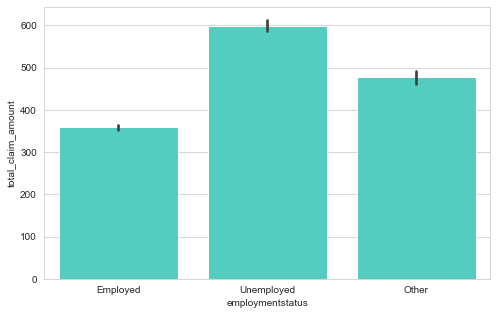

In [103]:
# Now how would we order it, to better serve our analysis and in a way that is relevant to our target?
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['employmentstatus'],y=customer_df['total_claim_amount'], color='turquoise')

In [104]:
# The 'least' employed have the most claim amount - I will order it from 0 (least employment) to 2 (most employment)
# Define a dictionary for encoding variable
emp_dict = {'Unemployed':0,
            'Other':1,
            'Employed':2}

# Create the mapped values in a new column
ordinal['employmentstatus'] = ordinal['employmentstatus'].map(emp_dict)

# Check
ordina

NameError: name 'ordina' is not defined

3. Encode the location_code


In [105]:
ordinal.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

<AxesSubplot:xlabel='location_code', ylabel='total_claim_amount'>

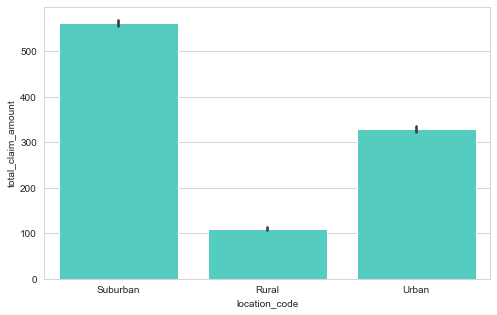

In [106]:
# Checking the plot again
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['location_code'],y=customer_df['total_claim_amount'], color='turquoise')

In [107]:
# it looks coherent with the value_counts => the higher the concentration of cars, the higher the total_claim_amount
# Define a dictionary for encoding variable
loc_dict = {'Rural':0,
            'Urban':1,
            'Suburban':2}

# Create the mapped values in a new column
ordinal['location_code'] = ordinal['location_code'].map(loc_dict)

# Check
ordinal


,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,2,Medsize
QZ44356,1,0,2,Medsize
AI49188,2,2,2,Medsize
WW63253,0,0,2,Medsize
HB64268,0,2,0,Medsize
...,...,...,...,...
LA72316,0,2,1,Medsize
PK87824,1,2,2,Medsize
TD14365,1,0,2,Medsize


In [108]:
4. Encode the vehicle_size

SyntaxError: invalid syntax (Temp/ipykernel_57396/4243228705.py, line 1)

In [109]:
ordinal.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

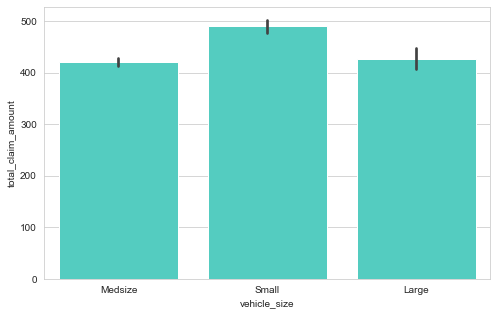

In [110]:
# Checking the plot again
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['vehicle_size'],y=customer_df['total_claim_amount'], color='turquoise')

In [111]:
# not a lot of difference here, will rank this variable based on size, pretty straightforward
# Define a dictionary for encoding variable
car_dict = {'Small':0,
            'Medsize':1,
            'Large':2}

# Create the mapped values in a new column
ordinal['vehicle_size'] = ordinal['vehicle_size'].map(car_dict)

# Check
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,2,1
QZ44356,1,0,2,1
AI49188,2,2,2,1
WW63253,0,0,2,1
HB64268,0,2,0,1
...,...,...,...,...
LA72316,0,2,1,1
PK87824,1,2,2,1
TD14365,1,0,2,1


In [112]:
Getting all of our encoded categorical data together

SyntaxError: invalid syntax (Temp/ipykernel_57396/97414138.py, line 1)

In [113]:
ordinal.reset_index(drop=True, inplace=True)
encoded_cat.reset_index(drop=True, inplace=True)
final_cat = pd.concat([ordinal, encoded_cat], axis=1)
final_cat

NameError: name 'encoded_cat' is not defined

In [114]:
Getting all of our data together and checking for NaNs

SyntaxError: invalid syntax (Temp/ipykernel_57396/502537912.py, line 1)

In [115]:
numerical_df.shape

NameError: name 'numerical_df' is not defined

In [116]:
data = pd.merge(numerical_df, final_cat, how='left', left_index=True, right_index=True)
data = data.drop('total_claim_amount', axis=1)
target = pd.DataFrame(customer_df['total_claim_amount'])
data.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
data = pd.merge(data, target, how='left', left_index=True, right_index=True)
data

NameError: name 'numerical_df' is not defined

In [117]:
data.isna().sum()

NameError: name 'data' is not defined

# Lab | Comparing regression models


In [118]:

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

SyntaxError: invalid syntax (Temp/ipykernel_57396/1081793985.py, line 1)

In [119]:
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis = 1)

NameError: name 'data' is not defined

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

NameError: name 'X' is not defined

# Linear Regression

In [121]:
def modeling_1(y, X, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [122]:
predictions1, y_test1, r2_1 = modeling_1(y, X, test_size=0.24)

NameError: name 'y' is not defined

In [123]:
Visualizing the differences between real and predicted values

SyntaxError: invalid syntax (Temp/ipykernel_57396/2929475687.py, line 1)

In [124]:
results = diff_df(y_test, predictions1)
results

NameError: name 'diff_df' is not defined

# 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [125]:
def modeling(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

Use the function to check LinearRegressor and KNeighborsRegressor.

In [126]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10)], test_size=0.24)

NameError: name 'y' is not defined

In [127]:
4. You can check also the MLPRegressor for this task!

SyntaxError: invalid syntax (Temp/ipykernel_57396/1810583750.py, line 1)

In [128]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [129]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10), MLPRegressor(

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_57396/738124733.py, line 1)

In [130]:
5. Check and discuss the results.

SyntaxError: invalid syntax (Temp/ipykernel_57396/3740500718.py, line 1)

In [131]:
Let's check how the predictions compare to the results. \ We could improve the function to run different k values and return the best predictions. \ Same with the MLP regressor and the max_iter values.

SyntaxError: EOL while scanning string literal (Temp/ipykernel_57396/886908138.py, line 1)

Finding the best K value

In [132]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

NameError: name 'X_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (13,) and (0,)

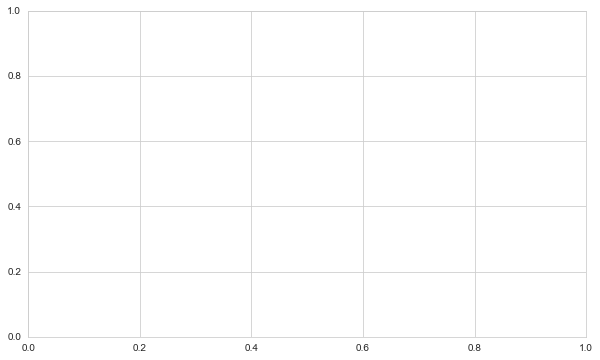

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [134]:
The best k value is 10.

SyntaxError: invalid syntax (Temp/ipykernel_57396/3977573570.py, line 1)

In [135]:
k_predictions, k_y_test, k_r2 = modeling(y, X, models=[KNeighborsRegressor(n_neighbors=10)], test_size=0.24)

NameError: name 'y' is not defined

In [136]:
LR_predictions, LR_y_test, LR_r2 = modeling(y, X, models=[LinearRegression()],test_size=0.24)

NameError: name 'y' is not defined

In [137]:
MLP_predictions, y_test, MLP_r2 = modeling(y, X, models=[MLPRegressor(max_iter=250)],test_size=0.24)

NameError: name 'y' is not defined

In [138]:
k_results = diff_df(y_test, k_predictions)
k_results

NameError: name 'diff_df' is not defined

In [139]:
LR_results = diff_df(y_test, LR_predictions)
LR_results

NameError: name 'diff_df' is not defined

In [140]:
MLP_results = diff_df(y_test, MLP_predictions)
MLP_results

NameError: name 'diff_df' is not defined

In [141]:
def we_like_to_see(results):
    beautiful_graph = sns.regplot(results['true'], results['pred'])
    return beautiful_graph

In [142]:
k_beautiful_graph = we_like_to_see(k_results)

NameError: name 'k_results' is not defined

In [143]:
LR_beautiful_graph = we_like_to_see(LR_results)

NameError: name 'LR_results' is not defined

In [144]:
MLP_beautiful_graph = we_like_to_see(MLP_results)

NameError: name 'MLP_results' is not defined

The most accurate results are obtained with the MLP regressor.
The models could possibly be better at predicting the target, we can try revisiting the data

In [145]:
mask = np.zeros_like(numerical_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(numerical_df.corr(), mask=mask, annot=True)
plt.show()

NameError: name 'numerical_df' is not defined

In [146]:
mask = np.zeros_like(continuous.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(continuous.corr(), mask=mask, annot=True)
plt.show()

AttributeError: 'dict' object has no attribute 'corr'

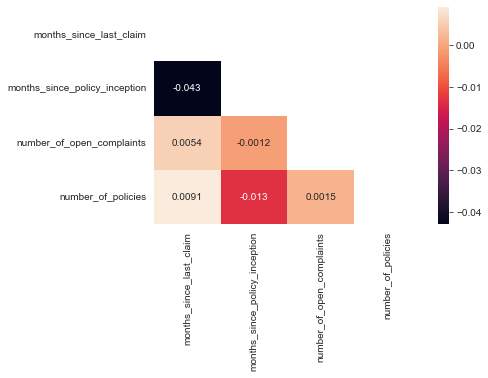

In [147]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

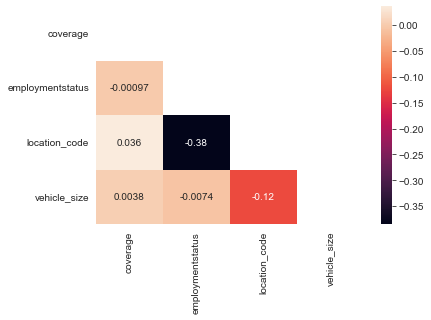

In [148]:
mask = np.zeros_like(ordinal.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(ordinal.corr(), mask=mask, annot=True)
plt.show()

Very little correlation between the discrete variables and the target, so let's run the model without those.

In [149]:
no_discrete = data.drop(columns=discrete_df.columns, axis=1)
no_discrete

NameError: name 'data' is not defined

In [150]:
no_dis_y = no_discrete['total_claim_amount']
no_dis_X = no_discrete.drop('total_claim_amount', axis=1)
no_dis_pred, no_dis_y_test, no_dis_r2 = modeling(no_dis_y, no_dis_X, models=[LinearRegression(), KNeighborsRegr

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_57396/150165061.py, line 3)

In [151]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(no_dis_X_train, no_dis_y_train)
    scores.append(model.score(no_dis_X_test, no_dis_y_test))

NameError: name 'no_dis_X_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (13,) and (0,)

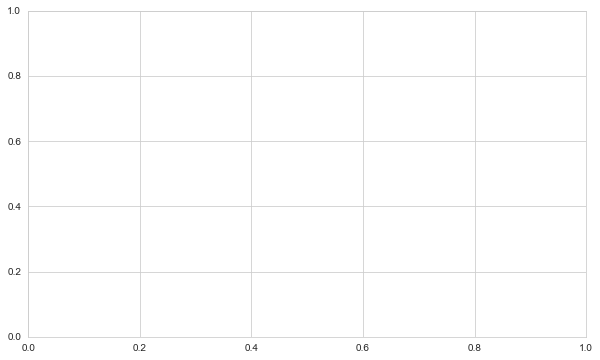

In [152]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

The best k value is now 6.

In [153]:
k2_predictions, k2_y_test, k2_r2 = modeling(no_dis_y, no_dis_X, models=[KNeighborsRegressor(n_neighbors=6)], test_size=0.24)

NameError: name 'no_dis_y' is not defined

In [154]:
k2_results = diff_df(no_dis_y_test, k2_predictions)
k2_results

NameError: name 'diff_df' is not defined

In [155]:
k2_beautiful_graph = we_like_to_see(k2_results)

NameError: name 'k2_results' is not defined

In [156]:
LR_beautiful_graph = we_like_to_see(LR_results)

NameError: name 'LR_results' is not defined

In [157]:
MLP_beautiful_graph = we_like_to_see(MLP_results)

NameError: name 'MLP_results' is not defined

Even though the KNN performs better now, it's still not as accurate as the other two.
 